In [71]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd

# get helper functions
from helper_functions import *

In [72]:
# set the random seed
np.random.seed(235)

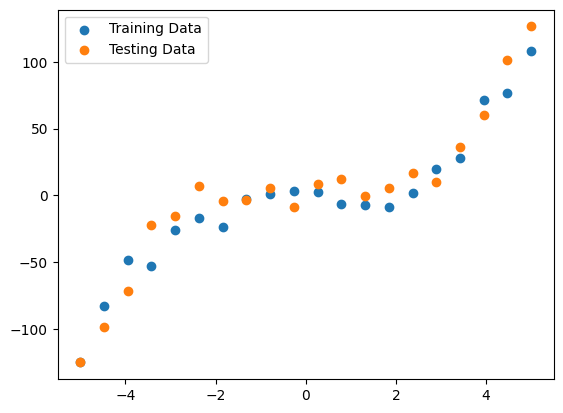

In [73]:
# generate training data
x_train, y_train = generate_data(20, 0, 9)
# generate test data
x_test, y_test = generate_data(20, 0, 9)

# plot the training data and testing data
plt.scatter(x_train, y_train, label='Training Data')
plt.scatter(x_test, y_test, label='Testing Data')
plt.legend()
plt.show()

In [74]:
# Normalize the data between [0,1]
x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
y_train_norm = (y_train - np.mean(y_train)) / np.std(y_train)
x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)
y_test_norm = (y_test - np.mean(y_train)) / np.std(y_train)

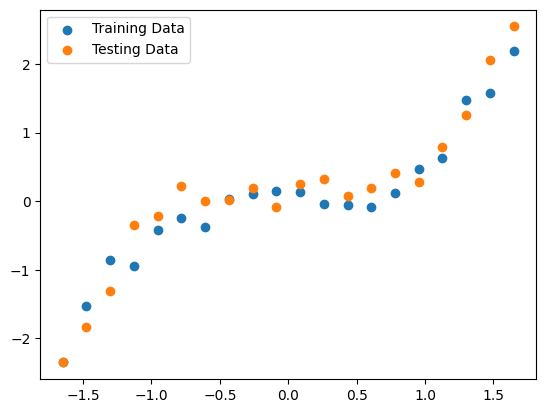

In [75]:
# plot the training data and testing data
plt.scatter(x_train_norm, y_train_norm, label='Training Data')
plt.scatter(x_test_norm, y_test_norm, label='Testing Data')
plt.legend()
plt.show()

In [76]:
# define the number of layers, number of neurons in each layern_layers = 1
n_units = 100
input_dim = 1 # considering that the input is implemented in one batch
output_dim = 1

var_v = 9 / np.var(y_train) #TODO: fix this
x_train = x_train_norm[0]
y_train = y_train_norm[0]

In [77]:
# Initialize the weights 
sigma_w1 =  np.eye(n_units)
sigma_w2 = (1/n_units) * np.eye(n_units) # TODO: check dimensions

mu_w1 = np.random.normal(0, 1, (n_units, input_dim))
mu_w2 = np.random.normal(0, (np.sqrt(1/n_units)), (output_dim, n_units))

# Initialize the biases
sigma_b1 =  np.eye(n_units)
sigma_b2 = (1/n_units) * np.ones((output_dim, 1)) #TODO: check dimensions

mu_b1 = np.random.normal(0, 1, (n_units, input_dim))
mu_b2 = np.random.normal(0, np.sqrt((1/n_units)), (output_dim, 1))

# print size of the weights and biases
print('mu_w1:', mu_w1.shape)
print('mu_w2:', mu_w2.shape)
print('mu_b1:', mu_b1.shape)
print('mu_b2:', mu_b2.shape)

mu_w1: (100, 1)
mu_w2: (1, 100)
mu_b1: (100, 1)
mu_b2: (1, 1)


In [78]:
# Perform the forward pass from input to hidden layer
mu_z = mu_w1 * x_train + mu_b1
var_z = sigma_w1 * x_train**2 + sigma_b1 #TODO: fix notation
cov_z_w = x_train * sigma_w1
cov_z_b = sigma_b1

# print the size of the mean and variance of the hidden layer
print('mu_z:', mu_z.shape)
print('var_z:', var_z.shape)
print('cov_z_w:', cov_z_w.shape)
print('cov_z_b:', cov_z_b.shape)

mu_z: (100, 1)
var_z: (100, 100)
cov_z_w: (100, 100)
cov_z_b: (100, 100)


In [79]:
# Calculate the diagonal Jacobian matrix of the Relu transformation
J = relu_derivative(mu_z)
print(J.shape)
J = np.diag(J.flatten())
print(J)
mu_a = J @ mu_z
var_a = J @ var_z @ J.T 
cov_a_w = J @ cov_z_w
cov_a_b = J @ cov_z_b

# print the size of the mean and variance of the hidden layer
print('mu_a:', mu_a.shape)
print('var_a:', var_a.shape)
print('cov_a_w:', cov_a_w.shape)
print('cov_a_b:', cov_a_b.shape)

(100, 1)
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
mu_a: (100, 1)
var_a: (100, 100)
cov_a_w: (100, 100)
cov_a_b: (100, 100)


In [80]:
f1 = np.ones((1,n_units))

# now perform the forward pass from the hidden layer to the output layer
mu_z0 = mu_w2 @ mu_a + mu_b2
var_z0 = f1 @ (sigma_w2 @ var_a + sigma_w2 * mu_a**2 + var_a * mu_w2**2) @ f1.T + sigma_b2 
cov_z0_w = f1 @ sigma_w2 @ mu_a
cov_z0_b = sigma_b2

# print the size of the mean and variance of the hidden layer
print('mu_z0:', mu_z0.shape)
print('var_z0:', var_z0.shape)
print('cov_z0_w:', cov_z0_w.shape)
print('cov_z0_b:', cov_z0_b.shape)

mu_z0: (1, 1)
var_z0: (1, 1)
cov_z0_w: (1, 1)
cov_z0_b: (1, 1)


In [81]:
# get y
mu_y = mu_z0
var_y = var_z0 + var_v

# print the size of the mean and variance of the hidden layer
print('mu_y:', mu_y.shape)
print('var_y:', var_y.shape)

mu_y: (1, 1)
var_y: (1, 1)


In [82]:
mu_y

array([[-0.23396976]])

In [83]:
# infer z0 after having observed y given that y = z0 + v
cov_y_z0 = var_z0
mu_z0_inf = mu_z0 + cov_y_z0.T @ np.linalg.inv(var_y) @ (y_train - mu_y)
var_z0_inf = var_z0 - cov_y_z0.T @ np.linalg.inv(var_y) @ cov_y_z0
#TODO diagonals
# print the size of the mean and variance of the hidden layer
print('mu_z0_inf:', mu_z0_inf.shape)
print('var_z0_inf:', var_z0_inf.shape)

mu_z0_inf: (1, 1)
var_z0_inf: (1, 1)


In [84]:
# apply one backward pass for TAGI from the output layer to the hidden layer
cov_zplus_z = var_z @ J.T @ mu_w2.T   #TODO: check formulation
Jz = cov_zplus_z @ np.linalg.inv(var_z0) 
mu_post_z = mu_z + Jz @ (mu_z0_inf - mu_z0) #TODO: transpose Jz
var_post_z = var_z + Jz @ (var_z0_inf-var_z0) @ Jz.T

In [85]:
cov_zplus_z.shape

(100, 1)

In [86]:
# apply one backward pass for TAGI from the output layer to the weights and biases
Jw2 = cov_z0_w @ np.linalg.inv(var_z0)
Jb2 = cov_z0_b @ np.linalg.inv(var_z0)

mu_post_w2 = mu_w2 + Jw2 @ (mu_z0_inf - mu_z0)
var_post_w2 = sigma_w2 + Jw2 @ (var_z0_inf - var_z0) @ Jw2.T

mu_post_b2 = mu_b2 + Jb2 @ (mu_z0_inf - mu_z0)
var_post_b2 = sigma_b2 + Jb2 @ (var_z0_inf - var_z0) @ Jb2.T

In [87]:
# apply one backward pass for TAGI from the output layer to the weights and biases
Jw1 = cov_z_w @ np.linalg.inv(var_z)
Jb1 = cov_z_b @ np.linalg.inv(var_z)

mu_post_w1 = mu_w1 + Jw1 @ (mu_post_z - mu_z)
var_post_w1 = sigma_w2 + Jw1 @ (var_post_z - var_z) @ Jw1.T

mu_post_b1 = mu_b2 + Jb1 @ (mu_post_z - mu_z)
var_post_b1 = sigma_b2 + Jb1 @ (var_post_z - var_z) @ Jb1.T

In [88]:
np.diag(np.diag(var_post_w2))

array([[-0.09146627,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.09146627,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.09146627, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.09146627,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.09146627,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.09146627]])

In [89]:
var_post_w2

array([[-0.09146627, -0.10146627, -0.10146627, ..., -0.10146627,
        -0.10146627, -0.10146627],
       [-0.10146627, -0.09146627, -0.10146627, ..., -0.10146627,
        -0.10146627, -0.10146627],
       [-0.10146627, -0.10146627, -0.09146627, ..., -0.10146627,
        -0.10146627, -0.10146627],
       ...,
       [-0.10146627, -0.10146627, -0.10146627, ..., -0.09146627,
        -0.10146627, -0.10146627],
       [-0.10146627, -0.10146627, -0.10146627, ..., -0.10146627,
        -0.09146627, -0.10146627],
       [-0.10146627, -0.10146627, -0.10146627, ..., -0.10146627,
        -0.10146627, -0.09146627]])